## 필수 함수

In [208]:
#엑셀 파일 불러오는 함수
import pandas as pd

def load_and_clean_data(filepath, header):
    df = pd.read_excel(filepath, header = header)

    new_columns = []
    for col in df.columns:
        merged_name = [str(c) for c in col if 'Unnamed' not in str(c)]
        new_columns.append(' '.join(merged_name).strip())

    df.columns = new_columns
    df= df.fillna(method='ffill', axis=0)

    return df

In [209]:
def clean_col_name(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = (
            df[col]
            .astype(str)                                   # NaN 대비
            .str.replace('·', '', regex=False)
            .str.replace('・', '', regex=False)
            .str.replace('?', '', regex=False)
            .str.strip()
            .str.replace(' ', '', regex=False)             # 모든 띄어쓰기 제거
        )
    return df

## 교육

In [210]:
df_origin = pd.read_excel(r"C:\Users\윤서현\Desktop\8페이지\0917대학운영측면데이터_Z점수화전.xlsx")

In [211]:
df_origin

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,1인당 교육비_전국Z,장학금_전국Z,등록금_전국Z,재적학생_전국Z,중도탈락률_전국Z,재학생 충원율_전국Z,전임교원확보율_전국Z,전임교원강의비율_전국Z,신입생 충원율_전국Z,신입생 경쟁률_전국Z
0,2023,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,0.496070,NaN,NaN,NaN,NaN
1,2023,NaN,NaN,NaN,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.951963,NaN,NaN
2,2023,NaN,NaN,NaN,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,4.738254,NaN,4.777678,NaN,NaN
3,2023,NaN,NaN,NaN,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,5.215434,NaN,4.913233,NaN,NaN
4,2023,NaN,NaN,NaN,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,0.496070,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1847,대학교,99.8,...,4.778606,3.989736,2.829449,4.184491,4.117501,5.480243,4.70272,3.964348,5.409995,4.760653
242,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
df_origin.head()

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,1인당 교육비_전국Z,장학금_전국Z,등록금_전국Z,재적학생_전국Z,중도탈락률_전국Z,재학생 충원율_전국Z,전임교원확보율_전국Z,전임교원강의비율_전국Z,신입생 충원율_전국Z,신입생 경쟁률_전국Z
0,2023,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,0.496070,NaN,NaN,NaN,NaN
1,2023,NaN,NaN,NaN,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.951963,NaN,NaN
2,2023,NaN,NaN,NaN,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,4.738254,NaN,4.777678,NaN,NaN
3,2023,NaN,NaN,NaN,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,5.215434,NaN,4.913233,NaN,NaN
4,2023,NaN,NaN,NaN,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,0.496070,NaN,NaN,NaN,NaN


In [213]:
df_origin.columns

Index(['기준연도', '설립구분', '지역', '상태', '학교', '취업률', '교원연구(국내)', '교원연구(국제)', '학교종류',
       '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금', '재적학생',
       '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율', '취업률_전국Z',
       '교원연구(국내)_전국Z', '교원연구(국제)_전국Z', '외국인 학생수_전국Z', '1인당 교육비_전국Z', '장학금_전국Z',
       '등록금_전국Z', '재적학생_전국Z', '중도탈락률_전국Z', '재학생 충원율_전국Z', '전임교원확보율_전국Z',
       '전임교원강의비율_전국Z', '신입생 충원율_전국Z', '신입생 경쟁률_전국Z'],
      dtype='object')

In [214]:
#유지 취업률
keeping = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_5-다. 졸업생의 취업 현황_학교별자료.xlsx", header = [3,4,5,6,7])

keeping['연도'] = keeping['연도'].astype(int)
keeping_selected = keeping[['연도','설립구분','지역','상태','학교명','유지\n취업률 4차 계']]
keeping_selected.rename(columns = {'유지\n취업률 4차 계' : '유지취업률'}, inplace = True)

keeping_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\4094146965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keeping_selected.rename(columns = {'유지\n취업률 4차 계' : '유지취업률'}, inplace = True)


,연도,설립구분,지역,상태,학교명,유지취업률
0,2023,사립,경남,기존,가야대학교(김해),79.9
1,2023,사립,경기,기존,가천대학교,78.3
2,2023,사립,강원,기존,가톨릭관동대학교,74.7
3,2023,사립,충북,기존,가톨릭꽃동네대학교,86.2
4,2023,사립,경기,기존,가톨릭대학교,80.4


## 연구

In [215]:
#1인당 연구비
research_money = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-가. 연구비 수혜 실적_학교별자료.xlsx", header = [3,4,5,6,7])

research_money['기준연도'] = research_money['기준연도'].astype(int)
#교내연구비계산
research_money['교내연구비'] = research_money['연구비 지원 교내 연구비 남'] + research_money['연구비 지원 교내 연구비 여'] 

#교외연구비계산
research_money['교외연구비'] = research_money['연구비 지원 교외 중앙정부 연구비 남'] + research_money['연구비 지원 교외 중앙정부 연구비 여'] + \
    research_money['연구비 지원 교외 지자체 연구비 남'] + research_money['연구비 지원 교외 지자체 연구비 여'] + \
    research_money['연구비 지원 교외 민간 연구비 남'] + research_money['연구비 지원 교외 민간 연구비 여'] +\
    research_money['연구비 지원 교외 외국 연구비 남'] + research_money['연구비 지원 교외 외국 연구비 여']

#총교원수 계산
research_money['총교원수'] = research_money['전임\n교원 남'] + research_money['전임\n교원 여']


#1인당 연구비 계산
research_money['교내 1인당 연구비(천원)'] = (research_money['교내연구비'] / research_money['총교원수'])
research_money['교외 1인당 연구비(천원)'] = (research_money['교외연구비'] / research_money['총교원수'])

research_money_selected = research_money[['기준연도','설립구분','지역','상태','학교','교내 1인당 연구비(천원)','교외 1인당 연구비(천원)']].copy()
research_money_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교,교내 1인당 연구비(천원),교외 1인당 연구비(천원)
0,2023,사립,경남,기존,가야대학교(김해),1078.571429,4468.000000
1,2023,사립,경기,기존,가천대학교,10754.657114,104494.007165
2,2023,사립,강원,기존,가톨릭관동대학교,1541.679666,33463.417827
3,2023,사립,충북,기존,가톨릭꽃동네대학교,1250.000000,5360.375000
4,2023,사립,경기,기존,가톨릭대학교,2484.615385,55214.038462


In [216]:
#졸업생 진학률
graduate = keeping.copy()
graduate_selected = graduate[['연도','설립구분','지역','상태','학교명','졸업자(A) 남', '졸업자(A) 여','진학자(C) 남', '진학자(C) 여']].copy()
graduate_selected['졸업자'] = graduate_selected['졸업자(A) 남'] + graduate_selected['졸업자(A) 여']
graduate_selected['진학자'] = graduate_selected['진학자(C) 남'] + graduate_selected['진학자(C) 여']

graduate_selected['진학률'] = graduate_selected['진학자'] / graduate_selected['졸업자']

graduate_final = graduate_selected[['연도','설립구분','지역','상태','학교명','진학률']].copy()
graduate_final.head()

,연도,설립구분,지역,상태,학교명,진학률
0,2023,사립,경남,기존,가야대학교(김해),0.001912
1,2023,사립,경기,기존,가천대학교,0.063963
2,2023,사립,강원,기존,가톨릭관동대학교,0.044118
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.010870
4,2023,사립,경기,기존,가톨릭대학교,0.101932


## 산학창업

In [217]:
#산업체경력전임교원수
ppro = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_12-아. 산업체 경력 전임교원 현황_학교별자료.xlsx", header = [3,4,5])

ppro['기준연도'] = ppro['기준연도'].astype(int)
ppro_selected = ppro[['기준연도','설립구분','지역','상태','학교','5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 ~ 3년 미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 3년 ~ 5년 미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 5년~10년미만',
       '5년 이내 신규임용 전임교원 산업체 경력 전임교원 10년 이상']].copy()

ppro_selected['산업체경력전임교원수'] = ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 미만'] + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 1년 ~ 3년 미만'] + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 3년 ~ 5년 미만']\
                                   + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 5년~10년미만'] + ppro_selected['5년 이내 신규임용 전임교원 산업체 경력 전임교원 10년 이상']

ppro_final = ppro_selected[['기준연도','설립구분','지역','상태','학교','산업체경력전임교원수']].copy()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


In [218]:
#기술이전 수입료
tech = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-타. 기술이전 수입료 및 계약 실적_학교별자료.xlsx", header = 3)

tech.rename(columns = {'기 준 연 도' : '기준연도',
                       '학 교 종 류' : '학교종류',
                       '설 립 구 분' : '설립구분',
                       '지 역' : '지역',
                       '상 태' : '상태',
                       '학 교 명' : '학교명',
                       '건 수' : '건수',
                       '수 입 료   ( 원 )' : '수입료(원)'}, inplace = True)

tech_selected = tech[['기준연도','설립구분','지역','상태','학교명','수입료(원)']].copy()
tech_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교명,수입료(원)
0,2023,사립,경남,기존,가야대학교(김해),0
1,2023,사립,경기,기존,가천대학교,965127272
2,2023,사립,강원,기존,가톨릭관동대학교,226161515
3,2023,사립,경기,기존,가톨릭대학교,1109571817
4,2023,국립,강원,기존,강원대학교,2555339626


In [219]:
#현장실습이수학생수
compa = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-카-1. 현장실습 운영 현황_학교별자료.xlsx", header = [3,4,5,6])

compa['기준연도'] = compa['기준연도'].astype(int)
compa_selected = compa[['기준연도', '학교', '설립구분', '지역', '상태', '실습기간 4주 이상 이수학생 수','실습기간 8주 이상 이수학생 수','실습기간 12주 이상 이수학생 수']]

compa_selected['현장실습 이수학생 수 곱셈'] = compa_selected['실습기간 4주 이상 이수학생 수'] + compa_selected['실습기간 8주 이상 이수학생 수']*2 + compa_selected['실습기간 12주 이상 이수학생 수']*3

compa_final = compa_selected[['기준연도','학교','설립구분','지역','상태','현장실습 이수학생 수 곱셈']].copy()
compa_final.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3187064151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compa_selected['현장실습 이수학생 수 곱셈'] = compa_selected['실습기간 4주 이상 이수학생 수'] + compa_selected['실습기간 8주 이상 이수학생 수']*2 + compa_selected['실습기간 12주 이상 이수학생 수']*3


,기준연도,학교,설립구분,지역,상태,현장실습 이수학생 수 곱셈
0,2023,가천대학교,사립,경기,기존,1261
1,2023,가톨릭관동대학교,사립,강원,기존,488
2,2023,가톨릭대학교,사립,경기,기존,605
3,2023,강남대학교,사립,경기,기존,60
4,2023,강원대학교,국립,강원,기존,464


In [220]:
#캡스톤디자인
caps = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-카-2. 캡스톤 디자인(창의적 설계) 운영 현황_학교별자료.xlsx", header = [3,4,5] )

caps['기준연도'] = caps['기준연도'].astype(int)

# '이수\n학생수(명) 타학과 계열 인문·사회', '이수\n학생수(명) 타학과 계열 자연과학','이수\n학생수(명) 타학과 계열 공학', '이수\n학생수(명) 타학과 계열 의학','이수\n학생수(명) 타학과 계열 예·체능'
caps['캡스톤디자인이수학생수'] = (caps['이수\n학생수(명) 해당학과'] + caps['이수\n학생수(명) 타학과 계열 인문·사회'] + caps['이수\n학생수(명) 타학과 계열 자연과학'] + caps['이수\n학생수(명) 타학과 계열 공학'] 
                    + caps['이수\n학생수(명) 타학과 계열 의학'] + caps['이수\n학생수(명) 타학과 계열 예·체능'])

caps_selected = caps[['기준연도','학교종류','설립구분','지역','상태','학교','캡스톤디자인이수학생수']].copy()
caps_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,캡스톤디자인이수학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),8
1,2023,대학교,사립,경기,기존,가천대학교,751
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,1993
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,36
4,2023,대학교,사립,경기,기존,가톨릭대학교,800


In [221]:
#학생창업자수
student_startup = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-하-1-(2). 학생의 창업 및 창업지원 현황_학교별자료.xlsx", header = [3,4,5])
student_startup['기준연도'] = student_startup['기준연도'].astype(int)

student_startup_selected = student_startup[['기준연도','학교종류','설립구분','지역','상태','학교','학생창업현황 창업자 수']].copy()
student_startup_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,학생창업현황 창업자 수
0,2023,대학교,사립,경남,기존,가야대학교(김해),0
1,2023,대학교,사립,경기,기존,가천대학교,57
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,5
3,2023,대학교,사립,경기,기존,가톨릭대학교,3
4,2023,대학교,사립,경기,기존,강남대학교,12


In [222]:
#교원창업자 수
prof_startup = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-하-1-(1). 교원의 창업 및 창업지원 현황_학교별자료.xlsx", header = [3,4,5])
prof_startup['기준연도'] = prof_startup['기준연도'].astype(int)

prof_startup_selected = prof_startup[['기준연도','학교종류','설립구분','지역','상태','학교','교원 창업 현황 창업자 수']].copy()
prof_startup_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,교원 창업 현황 창업자 수
0,2023,대학교,사립,경남,기존,가야대학교(김해),0
1,2023,대학교,사립,경기,기존,가천대학교,5
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,4
3,2023,대학교,사립,경기,기존,가톨릭대학교,0
4,2023,대학교,사립,서울,기존,가톨릭대학교 _제2캠퍼스,0


In [223]:
#학생창업 지원액
student_startup_money = student_startup[['기준연도','학교종류','설립구분','지역','상태','학교','학생창업 지원현황 지원액 (원) 교비','학생창업 지원현황 지원액 (원) 정부 및 지자체 지원']].copy()
student_startup_money['학생창업 지원액'] = student_startup_money['학생창업 지원현황 지원액 (원) 교비'] + student_startup_money['학생창업 지원현황 지원액 (원) 정부 및 지자체 지원']

student_startup_money.drop(columns = ['학생창업 지원현황 지원액 (원) 교비','학생창업 지원현황 지원액 (원) 정부 및 지자체 지원'], inplace = True)

## 글로벌

In [224]:
#학생 1인당 외국인 전임교원 수
#외국인 전임교원 수
foreign_prof = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_6-다-1. 국가별 외국인 전임교원 현황_학교별자료.xlsx", header = [3,4,5])
foreign_prof['외국인 전임교원'] = foreign_prof['전임교원 계 남'] + foreign_prof['전임교원 계 여']

foreign_prof_grouped = foreign_prof.groupby("학교", as_index=False)["외국인 전임교원"].sum()
foreign_prof_unique = foreign_prof.drop_duplicates("학교")
foreign_prof_final = pd.merge(foreign_prof_unique[["학교"]], foreign_prof_grouped, on="학교", how="left")
foreign_prof_final = clean_col_name(foreign_prof_final, ['학교'])
student_num = df_origin[['학교','재적학생']].copy()
student_num = clean_col_name(student_num,['학교'])

# 1. 두 데이터프레임을 학교 기준으로 합치기
foreign_merage = pd.merge(
    foreign_prof_final, 
    student_num, 
    on="학교", 
    how="left"
)

# 2. 학생 1인당 외국인 전임교원 수 계산
foreign_merage["학생 1인당 외국인 전임교원 수"] = (
    foreign_merage["외국인 전임교원"] / foreign_merage["재적학생"]
)

foreign_merage.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,학교,외국인 전임교원,재적학생,학생 1인당 외국인 전임교원 수
0,가야대학교(김해),3,2153.0,0.001393
1,가천대학교,127,27102.0,0.004686
2,가톨릭관동대학교,2,9398.0,0.000213
3,가톨릭대학교,10,9546.0,0.001048
4,가톨릭대학교_제2캠퍼스,6,NaN,NaN


In [225]:
#외국인 학생 수
foreign_student = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-바-1. 외국학생 현황_학교별자료.xlsx", header = [3,4,5,6])
foreign_student['기준연도'] = foreign_student['기준연도'].astype(int)

foreign_student_selected = foreign_student[['기준연도','학교종류','설립구분','지역','상태','학교','계\n(D=A+B+C)']].copy()
foreign_student_selected.rename(columns = {'계\n(D=A+B+C)' : '외국인 학생 수'}, inplace = True)

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


In [226]:
#외국인 중도 탈락률
foreign_drop = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_4-바-2. 외국학생 중도탈락 현황_학교별자료.xlsx", header = [3,4,5])
foreign_drop['기준연도'] = foreign_drop['기준연도'].astype(int)

foreign_drop_selected = foreign_drop[['기준연도','설립구분','지역','상태','학교','외국 학생 중도탈락률(%)(B/A)×100']].copy()
foreign_drop_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교,외국 학생 중도탈락률(%)(B/A)×100
0,2023,사립,경남,기존,가야대학교(김해),17.6
1,2023,사립,경기,기존,가천대학교,5.0
2,2023,사립,강원,기존,가톨릭관동대학교,0.0
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.0
4,2023,사립,경기,기존,가톨릭대학교,2.7


## 병합하기

In [227]:
df_origin.columns

Index(['기준연도', '설립구분', '지역', '상태', '학교', '취업률', '교원연구(국내)', '교원연구(국제)', '학교종류',
       '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금', '재적학생',
       '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율', '취업률_전국Z',
       '교원연구(국내)_전국Z', '교원연구(국제)_전국Z', '외국인 학생수_전국Z', '1인당 교육비_전국Z', '장학금_전국Z',
       '등록금_전국Z', '재적학생_전국Z', '중도탈락률_전국Z', '재학생 충원율_전국Z', '전임교원확보율_전국Z',
       '전임교원강의비율_전국Z', '신입생 충원율_전국Z', '신입생 경쟁률_전국Z'],
      dtype='object')

In [228]:
df_origin

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,1인당 교육비_전국Z,장학금_전국Z,등록금_전국Z,재적학생_전국Z,중도탈락률_전국Z,재학생 충원율_전국Z,전임교원확보율_전국Z,전임교원강의비율_전국Z,신입생 충원율_전국Z,신입생 경쟁률_전국Z
0,2023,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,0.496070,NaN,NaN,NaN,NaN
1,2023,NaN,NaN,NaN,경남과학기술대학교(폐교),NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.951963,NaN,NaN
2,2023,NaN,NaN,NaN,영산대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,4.738254,NaN,4.777678,NaN,NaN
3,2023,NaN,NaN,NaN,영산대학교_제2캠퍼스,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,5.215434,NaN,4.913233,NaN,NaN
4,2023,NaN,NaN,NaN,한북대학교,NaN,NaN,NaN,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,0.496070,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1847,대학교,99.8,...,4.778606,3.989736,2.829449,4.184491,4.117501,5.480243,4.70272,3.964348,5.409995,4.760653
242,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3150,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,대학교,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
keeping_selected.rename(columns = {'학교명' : '학교',
                                   '연도' : '기준연도'}, inplace = True)
keeping_selected = clean_col_name(keeping_selected, ['학교'])
keeping_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_4132\3021535470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keeping_selected.rename(columns = {'학교명' : '학교',


,기준연도,설립구분,지역,상태,학교,유지취업률
0,2023,사립,경남,기존,가야대학교(김해),79.9
1,2023,사립,경기,기존,가천대학교,78.3
2,2023,사립,강원,기존,가톨릭관동대학교,74.7
3,2023,사립,충북,기존,가톨릭꽃동네대학교,86.2
4,2023,사립,경기,기존,가톨릭대학교,80.4


In [230]:
merge_first = pd.merge(df_origin, keeping_selected, on = ['기준연도','설립구분', '지역','상태','학교'],how = 'outer')

In [231]:
merge_first.head()

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,장학금_전국Z,등록금_전국Z,재적학생_전국Z,중도탈락률_전국Z,재학생 충원율_전국Z,전임교원확보율_전국Z,전임교원강의비율_전국Z,신입생 충원율_전국Z,신입생 경쟁률_전국Z,유지취업률
0,2023,공립,서울,기존,서울시립대학교,67.2,0.5561,0.4259,대학교,100.0,...,3.719871,2.352317,5.402022,4.093868,6.251073,4.963736,3.761016,5.421295,6.140183,88.4
1,2023,국립,강원,기존,강원대학교,57.6,0.5246,0.5297,대학교,100.0,...,4.131092,3.391886,6.447649,4.141133,5.642799,5.036605,4.453314,5.421295,5.060551,77.8
2,2023,국립,강원,기존,강원대학교_제2캠퍼스,64.3,0.5786,0.4016,대학교,99.6,...,4.642934,3.480203,5.015858,4.684677,4.782826,4.688271,4.312918,5.398695,4.400776,77.3
3,2023,국립,강원,기존,국립강릉원주대학교,62.0,0.6217,0.3343,대학교,99.2,...,4.449326,3.483442,4.776574,4.873736,4.982088,4.954485,4.390378,5.376096,4.580714,73.2
4,2023,국립,강원,기존,국립강릉원주대학교_제2캠퍼스,62.6,0.8997,0.2565,대학교,99.8,...,4.501391,3.504828,4.221765,4.637412,5.558899,4.936710,6.728701,5.409995,4.720667,83.7


In [232]:
#연구비
research_money_selected = clean_col_name(research_money_selected, ['학교'])
research_money_selected.head()

,기준연도,설립구분,지역,상태,학교,교내 1인당 연구비(천원),교외 1인당 연구비(천원)
0,2023,사립,경남,기존,가야대학교(김해),1078.571429,4468.000000
1,2023,사립,경기,기존,가천대학교,10754.657114,104494.007165
2,2023,사립,강원,기존,가톨릭관동대학교,1541.679666,33463.417827
3,2023,사립,충북,기존,가톨릭꽃동네대학교,1250.000000,5360.375000
4,2023,사립,경기,기존,가톨릭대학교,2484.615385,55214.038462


In [233]:
#진학률
graduate_final.rename(columns = {'학교명' : '학교', '연도' : '기준연도'}, inplace = True)
graduate_final = clean_col_name(graduate_final, ['학교'])
graduate_final.head()

,기준연도,설립구분,지역,상태,학교,진학률
0,2023,사립,경남,기존,가야대학교(김해),0.001912
1,2023,사립,경기,기존,가천대학교,0.063963
2,2023,사립,강원,기존,가톨릭관동대학교,0.044118
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.010870
4,2023,사립,경기,기존,가톨릭대학교,0.101932


In [234]:
merge_sec = (merge_first.merge(research_money_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')
             .merge(graduate_final, on = ['기준연도','설립구분','지역','상태','학교'] ))

In [235]:
ppro_final = clean_col_name(ppro_final, ['학교'])
merge_third = pd.merge(merge_sec, ppro_final, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [236]:
merge_third

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),학교종류,신입생 충원율,...,재학생 충원율_전국Z,전임교원확보율_전국Z,전임교원강의비율_전국Z,신입생 충원율_전국Z,신입생 경쟁률_전국Z,유지취업률,교내 1인당 연구비(천원),교외 1인당 연구비(천원),진학률,산업체경력전임교원수
0,2023,공립,서울,기존,서울시립대학교,67.2,0.5561,0.4259,대학교,100.0,...,6.251073,4.963736,3.761016,5.421295,6.140183,88.4,11668.698482,123492.258134,0.094311,38.0
1,2023,국립,강원,기존,강릉원주대학교,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,2023,국립,강원,기존,강릉원주대학교_제2캠퍼스,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,2023,국립,강원,기존,강원대학교,57.6,0.5246,0.5297,대학교,100.0,...,5.642799,5.036605,4.453314,5.421295,5.060551,77.8,1289.055623,128976.985490,0.127986,86.0
4,2023,국립,강원,기존,강원대학교_제2캠퍼스,64.3,0.5786,0.4016,대학교,99.6,...,4.782826,4.688271,4.312918,5.398695,4.400776,77.3,1003.584615,47931.056410,0.033762,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023,특별법법인,광주,기존,광주과학기술원,58.8,0.0886,0.8766,대학교,107.0,...,5.556277,5.523710,4.269347,5.816789,7.339774,94.7,49183.109948,451082.801047,0.726619,8.0
278,2023,특별법법인,대구,기존,대구경북과학기술원,54.1,0.0827,0.6767,대학교,96.8,...,5.257384,5.209992,5.242437,5.240498,7.219815,85.7,0.000000,330779.352113,0.613497,6.0
279,2023,특별법법인,대전,기존,한국과학기술원,70.3,0.0685,1.0507,대학교,106.5,...,5.013550,5.066750,6.418861,5.788539,4.620701,85.9,4958.571429,674724.947143,0.500705,42.0
280,2023,특별법법인,울산,기존,울산과학기술원,66.7,0.0580,0.9366,대학교,100.3,...,5.477621,5.077977,6.331718,5.438245,6.520053,88.7,12906.775000,475455.806250,0.401606,17.0


In [237]:
tech_selected.rename(columns = {'학교명' : '학교'}, inplace = True)
tech_selected = clean_col_name(tech_selected, ['학교'])
tech_selected.head()

,기준연도,설립구분,지역,상태,학교,수입료(원)
0,2023,사립,경남,기존,가야대학교(김해),0
1,2023,사립,경기,기존,가천대학교,965127272
2,2023,사립,강원,기존,가톨릭관동대학교,226161515
3,2023,사립,경기,기존,가톨릭대학교,1109571817
4,2023,국립,강원,기존,강원대학교,2555339626


In [238]:
merge_four = pd.merge(merge_third, tech_selected, on = ['기준연도','설립구분','지역','상태','학교'],  how = 'outer')

In [239]:
compa_final = clean_col_name(compa_final, ['학교'])
compa_final.head()

,기준연도,학교,설립구분,지역,상태,현장실습 이수학생 수 곱셈
0,2023,가천대학교,사립,경기,기존,1261
1,2023,가톨릭관동대학교,사립,강원,기존,488
2,2023,가톨릭대학교,사립,경기,기존,605
3,2023,강남대학교,사립,경기,기존,60
4,2023,강원대학교,국립,강원,기존,464


In [240]:
merge_five = pd.merge(merge_four, compa_final, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [241]:
caps_selected = clean_col_name(caps_selected, ['학교'])
caps_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,캡스톤디자인이수학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),8
1,2023,대학교,사립,경기,기존,가천대학교,751
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,1993
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,36
4,2023,대학교,사립,경기,기존,가톨릭대학교,800


In [242]:
merge_six = pd.merge(merge_five, caps_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [243]:
merge_six.drop(columns = ['학교종류_y'], inplace = True)

In [244]:
student_startup_selected = clean_col_name(student_startup_selected, ['학교'])
student_startup_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,학생창업현황 창업자 수
0,2023,대학교,사립,경남,기존,가야대학교(김해),0
1,2023,대학교,사립,경기,기존,가천대학교,57
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,5
3,2023,대학교,사립,경기,기존,가톨릭대학교,3
4,2023,대학교,사립,경기,기존,강남대학교,12


In [245]:
merge_seven = pd.merge(merge_six, student_startup_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [246]:
merge_seven.drop(columns = ['학교종류_x'], inplace = True)

In [247]:
prof_startup_selected = clean_col_name(prof_startup_selected,['학교'])
prof_startup_selected.drop(columns = ['학교종류'], inplace = True)
merge_eight = pd.merge(merge_seven, prof_startup_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [248]:
merge_eight

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),신입생 충원율,신입생 경쟁률,...,교내 1인당 연구비(천원),교외 1인당 연구비(천원),진학률,산업체경력전임교원수,수입료(원),현장실습 이수학생 수 곱셈,캡스톤디자인이수학생수,학교종류,학생창업현황 창업자 수,교원 창업 현황 창업자 수
0,2023,공립,서울,기존,서울시립대학교,67.2,0.5561,0.4259,100.0,13.3,...,11668.698482,123492.258134,0.094311,38.0,9.743331e+08,441.0,798.0,대학교,15.0,3.0
1,2023,국립,강원,기존,강릉원주대학교,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,국립,강원,기존,강릉원주대학교_제2캠퍼스,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,국립,강원,기존,강원대학교,57.6,0.5246,0.5297,100.0,7.9,...,1289.055623,128976.985490,0.127986,86.0,2.555340e+09,464.0,1313.0,대학교,19.0,18.0
4,2023,국립,강원,기존,강원대학교_제2캠퍼스,64.3,0.5786,0.4016,99.6,4.6,...,1003.584615,47931.056410,0.033762,22.0,NaN,157.0,746.0,대학교,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2023,특별법법인,광주,기존,광주과학기술원,58.8,0.0886,0.8766,107.0,19.3,...,49183.109948,451082.801047,0.726619,8.0,1.356045e+09,46.0,8.0,대학교,11.0,4.0
280,2023,특별법법인,대구,기존,대구경북과학기술원,54.1,0.0827,0.6767,96.8,18.7,...,0.000000,330779.352113,0.613497,6.0,1.940816e+09,NaN,NaN,대학교,3.0,2.0
281,2023,특별법법인,대전,기존,한국과학기술원,70.3,0.0685,1.0507,106.5,5.7,...,4958.571429,674724.947143,0.500705,42.0,3.083806e+09,445.0,27.0,대학교,13.0,10.0
282,2023,특별법법인,울산,기존,울산과학기술원,66.7,0.0580,0.9366,100.3,15.2,...,12906.775000,475455.806250,0.401606,17.0,6.640874e+08,129.0,24.0,대학교,19.0,6.0


In [249]:
student_startup_money = clean_col_name(student_startup_money, ['학교'])
merge_nine = pd.merge(merge_eight, student_startup_money, on =['기준연도','설립구분','지역','상태','학교','학교종류'], how = 'outer' )

In [250]:
foreign_merage.drop(columns = ['외국인 전임교원','재적학생'], inplace = True)
foreign_merage = clean_col_name(foreign_merage, ['학교'])
merge_ten = pd.merge(merge_nine, foreign_merage, on = '학교', how = 'outer')

In [251]:
foreign_student_selected = clean_col_name(foreign_student_selected, ['학교'])
foreign_student_selected.drop(columns = ['학교종류'], inplace = True)

merge_eleven = pd.merge(merge_ten, foreign_student_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [252]:
foreign_drop_selected = clean_col_name(foreign_drop_selected, ['학교'])
merge_twelve = pd.merge(merge_eleven, foreign_drop_selected, on = ['기준연도','설립구분','지역','상태','학교'], how = 'outer')

In [253]:
#강릉원주대 예외처리
gw_origin = merge_twelve[merge_twelve['학교'].str.contains('강릉원주대')]
#강릉원주대, 강릉원주대 2캠, 국립강릉원주대, 국립강릉원주대 2캠

In [254]:
gw_origin

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(국제),신입생 충원율,신입생 경쟁률,...,수입료(원),현장실습 이수학생 수 곱셈,캡스톤디자인이수학생수,학교종류,학생창업현황 창업자 수,교원 창업 현황 창업자 수,학생창업 지원액,학생 1인당 외국인 전임교원 수,외국인 학생 수,외국 학생 중도탈락률(%)(B/A)×100
1,2023,국립,강원,기존,강릉원주대학교,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,국립,강원,기존,강릉원주대학교_제2캠퍼스,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023,국립,강원,기존,국립강릉원주대학교,62.0,0.6217,0.3343,99.2,5.5,...,271127280.0,142.0,1463.0,대학교,4.0,5.0,154533422.0,NaN,247.0,4.5
6,2023,국립,강원,기존,국립강릉원주대학교_제2캠퍼스,62.6,0.8997,0.2565,99.8,6.2,...,NaN,14.0,821.0,대학교,0.0,1.0,0.0,NaN,7.0,14.3


In [255]:
# NaN이 하나도 없는 컬럼만 확인
gw_origin.iloc[0].dropna()

기준연도             2023
설립구분               국립
지역                 강원
상태                 기존
학교            강릉원주대학교
산업체경력전임교원수       28.0
Name: 1, dtype: object

In [256]:
# 매핑 사전 (국립 → 일반)
mapping = {
    "국립강릉원주대학교": "강릉원주대학교",
    "국립강릉원주대학교_제2캠퍼스": "강릉원주대학교_제2캠퍼스"
}

# 복사본 만들어서 '학교' 컬럼 기준으로 매핑된 값 붙이기
df_base = gw_origin.copy()
df_base["학교_base"] = df_base["학교"].replace(mapping)

# 자기 자신과 merge (학교_base vs 학교)
merged = df_base.merge(
    df_base,
    left_on="학교_base",
    right_on="학교",
    suffixes=("", "_ref")
)

# 필요한 컬럼 값 채우기 (NaN → 참조행 값)
for col in gw_origin.columns:
    if col not in ["학교"]:  # 학교 컬럼은 그대로 유지
        merged[col] = merged[col].combine_first(merged[f"{col}_ref"])

# 최종 결과에서 참조용 컬럼 제거
result = merged[gw_origin.columns]
gw_result = result[result['학교'].str.contains('국립')]
merge_thirdt = merge_twelve[~merge_twelve['학교'].str.contains('강릉원주대', na = False)]

merge_final = pd.concat([merge_thirdt, gw_result])

## Z점수

In [257]:
merge_final.columns

Index(['기준연도', '설립구분', '지역', '상태', '학교', '취업률', '교원연구(국내)', '교원연구(국제)',
       '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금', '재적학생',
       '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율', '취업률_전국Z',
       '교원연구(국내)_전국Z', '교원연구(국제)_전국Z', '외국인 학생수_전국Z', '1인당 교육비_전국Z', '장학금_전국Z',
       '등록금_전국Z', '재적학생_전국Z', '중도탈락률_전국Z', '재학생 충원율_전국Z', '전임교원확보율_전국Z',
       '전임교원강의비율_전국Z', '신입생 충원율_전국Z', '신입생 경쟁률_전국Z', '유지취업률', '교내 1인당 연구비(천원)',
       '교외 1인당 연구비(천원)', '진학률', '산업체경력전임교원수', '수입료(원)', '현장실습 이수학생 수 곱셈',
       '캡스톤디자인이수학생수', '학교종류', '학생창업현황 창업자 수', '교원 창업 현황 창업자 수', '학생창업 지원액',
       '학생 1인당 외국인 전임교원 수', '외국인 학생 수', '외국 학생 중도탈락률(%)(B/A)×100'],
      dtype='object')

In [258]:
from scipy.stats import zscore

# -----------------------------
# 0. Z점수화할 컬럼 리스트
# -----------------------------
target_cols = [
  '취업률', '교원연구(국내)', '교원연구(국제)', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금', '등록금',
       '재적학생', '중도탈락률', '재학생 충원율', '전임교원확보율', '전임교원강의비율', '유지취업률',
       '교내 1인당 연구비(천원)', '교외 1인당 연구비(천원)', '진학률', '산업체경력전임교원수', '수입료(원)',
       '현장실습 이수학생 수 곱셈', '캡스톤디자인이수학생수','학생창업현황 창업자 수',
       '교원 창업 현황 창업자 수', '학생창업 지원액', '학생 1인당 외국인 전임교원 수', '외국인 학생 수',
       '외국 학생 중도탈락률(%)(B/A)×100'
]

# -----------------------------
# 1. 전국 단위로 Z점수화 (+5 shift)
# -----------------------------
for col in target_cols:
    merge_final[col + "_Z"] = 5 + zscore(merge_final[col], nan_policy="omit")

zscore_cols = [col + "_Z" for col in target_cols]

# 영역별 Z-점수 컬럼 매핑
area_dict = {
    "교육": [
        "신입생 충원율_Z", "신입생 경쟁률_Z",
        "재학생 충원율_Z", "중도탈락률_Z",
        "전임교원확보율_Z", "전임교원강의비율_Z",
        "1인당 교육비_Z", "장학금_Z",
        "등록금_Z", "취업률_Z", "유지취업률_Z"
    ],
    "연구": [
        "교원연구(국내)_Z", "교원연구(국제)_Z",
        "교내 1인당 연구비(천원)_Z", "교외 1인당 연구비(천원)_Z",
        "진학률_Z"
    ],
    "산학창업": [
        "산업체경력전임교원수_Z", "수입료(원)_Z",
        "현장실습 이수학생 수 곱셈_Z", "캡스톤디자인이수학생수_Z",
        "학생창업현황 창업자 수_Z", "교원 창업 현황 창업자 수_Z",
        "학생창업 지원액_Z"
    ],
    "글로벌": [
        "학생 1인당 외국인 전임교원 수_Z", "외국인 학생 수_Z",
        "외국 학생 중도탈락률(%)(B/A)×100_Z"
    ]
}

# 영역별 평균 점수 계산
for area, cols in area_dict.items():
    merge_final[area + "_평균"] = merge_final[cols].mean(axis=1, skipna=True)


# 지역 평균

region_mean = (
    merge_final.groupby("지역")[zscore_cols]
    .mean()
    .add_suffix("_지역평균")
)



# 최종 병합
df_result = (
    merge_final
    .merge(region_mean, on="지역", how="left")
)

In [ ]:
#엑셀로 저장
# df_result.to_excel('0917대학역량측면데이터.xlsx', index = False)

## 시각화

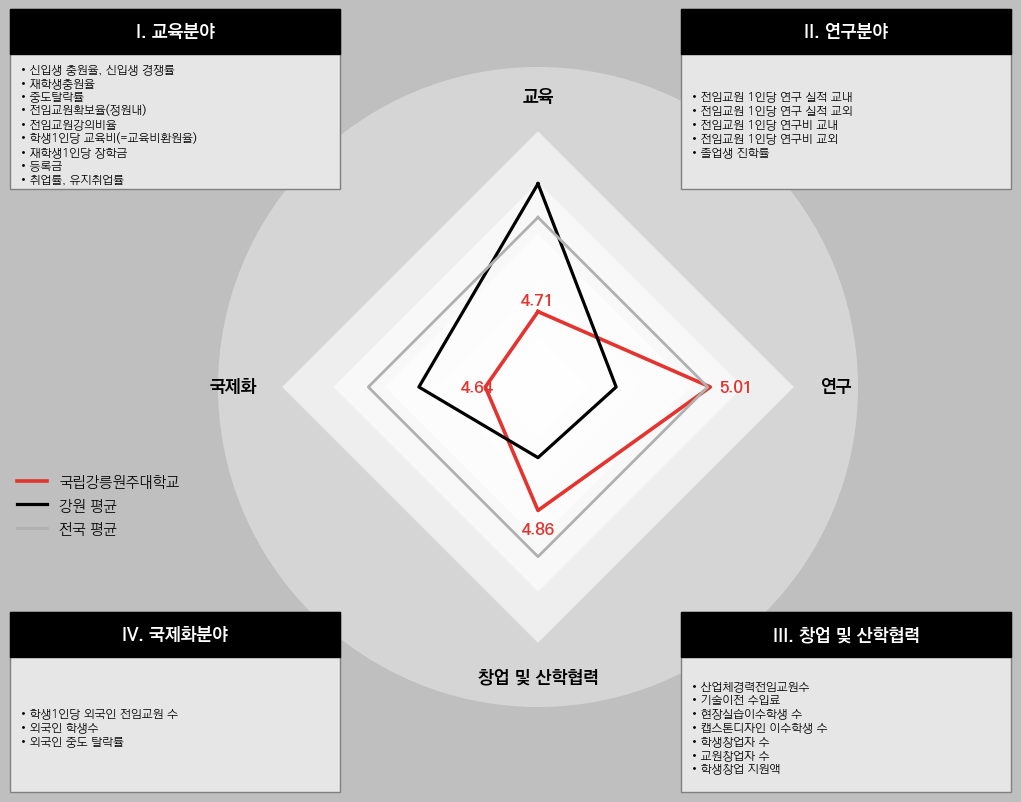

In [260]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patches as patches
from matplotlib.patches import Polygon

# -----------------------------
# 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 1) 데이터 준비
# -----------------------------
areas = ["교육", "연구", "산학창업", "글로벌"]
school_name = "국립강릉원주대학교"

row = merge_final[merge_final["학교"] == school_name].iloc[0]
school_vals = [float(row[a + "_평균"]) for a in areas]

region = row["지역"]
region_vals = merge_final[merge_final["지역"] == region][[a + "_평균" for a in areas]].mean().values.tolist()
national_vals = merge_final[[a + "_평균" for a in areas]].mean().values.tolist()

# -----------------------------
# 2) Figure 생성
# -----------------------------
fig = plt.figure(figsize=(11, 9))
fig.patch.set_facecolor("#BFBFBF")

ax = fig.add_axes([0.18, 0.12, 0.64, 0.76])

 # 일반 좌표축 (사각형용)
ax.set_facecolor("#F2F2F2")
ax.axis("equal")
ax.axis("off")

# -----------------------------
# 3) 사각형 레이더 좌표 변환
# -----------------------------
def to_square_coords(vals, vmin, vmax):
    """교육=위, 연구=오른쪽, 산학=아래, 글로벌=왼쪽"""
    norm = [(v - vmin) / (vmax - vmin) for v in vals]
    pts = [
        (0, norm[0]),      # 교육
        (norm[1], 0),      # 연구
        (0, -norm[2]),     # 산학창업
        (-norm[3], 0),     # 글로벌
    ]
    return np.array(pts + [pts[0]])

# 값 범위
stack = np.array(school_vals + region_vals + national_vals)
lo, hi = np.min(stack), np.max(stack)
pad = max((hi - lo) * 0.35, 0.12)
vmin, vmax = lo - pad, hi + pad

# 좌표 변환
school_xy = to_square_coords(school_vals, vmin, vmax)
region_xy = to_square_coords(region_vals, vmin, vmax)
# 전국 평균은 항상 5
national_xy = to_square_coords([5]*4, vmin, vmax)


# -----------------------------
# 4) 배경 격자 (다이아몬드)
# -----------------------------
for r in np.linspace(0.2, 1, 5):
    poly = Polygon([(0,r),(r,0),(0,-r),(-r,0)], closed=True,
                   facecolor="white", edgecolor="#DDDDDD", linewidth=0.7, alpha=0.6)
    ax.add_patch(poly)

# 축 라벨
ax.text(0,1.1,"교육",ha="center",va="bottom",fontsize=13,fontweight="bold")
ax.text(1.1,0,"연구",ha="left",va="center",fontsize=13,fontweight="bold")
ax.text(0,-1.1,"창업 및 산학협력",ha="center",va="top",fontsize=13,fontweight="bold")
ax.text(-1.1,0,"국제화",ha="right",va="center",fontsize=13,fontweight="bold")

# -----------------------------
# 4-1) 배경 원 추가
# -----------------------------
circle = plt.Circle((0,0), 1.25, transform=ax.transData, 
                    facecolor="#E5E5E5", edgecolor="none", alpha=0.6, zorder=0)
ax.add_patch(circle)

# -----------------------------
# 5) 데이터 플로팅
# -----------------------------
ax.plot(school_xy[:,0], school_xy[:,1], linewidth=2.6, color="#E3342F", label=school_name)
# ax.fill(school_xy[:,0], school_xy[:,1], color="#E3342F", alpha=0.25)

ax.plot(region_xy[:,0], region_xy[:,1], linewidth=2.3, color="#000000", label=f"{region} 평균")
# ax.fill(region_xy[:,0], region_xy[:,1], color="#2563EB", alpha=0.15)

ax.plot(national_xy[:,0], national_xy[:,1], linewidth=2.0, color="#B0B0B0", label="전국 평균")
# ax.fill(national_xy[:,0], national_xy[:,1], color="#111111", alpha=0.10)

# 꼭짓점 값 (학교)
for (x,y), val in zip(school_xy[:-1], school_vals):
    ax.text(x*1.15, y*1.15, f"{val:.2f}", ha="center", va="center",
            fontsize=12, fontweight="bold", color="#E3342F")

# 범례
ax.legend(loc="lower left", bbox_to_anchor=(-0.26,0.26),
          ncol=1, frameon=False, fontsize=11)

# -----------------------------
# 6) 네모 설명 박스
# -----------------------------
def draw_info_box(fig, x, y, w, h, title, content):
    body = patches.Rectangle((x,y), w, h, transform=fig.transFigure,
                             facecolor="#E6E6E6", edgecolor="gray", zorder=2)
    fig.patches.append(body)

    header_h = 0.05
    header = patches.Rectangle((x,y+h-header_h), w, header_h, transform=fig.transFigure,
                               facecolor="black", edgecolor="black", zorder=3)
    fig.patches.append(header)

    fig.text(x+w/2, y+h-header_h/2, title,
             ha="center", va="center", color="white", fontsize=13, weight="bold", zorder=4)
    fig.text(x+0.01, y+h-header_h-0.01, content,
             ha="left", va="top", color="black", fontsize=9, zorder=4)

# 박스 4개
draw_info_box(fig, 0.02, 0.72, 0.3, 0.20, "I. 교육분야",
              "• 신입생 충원율, 신입생 경쟁률\n• 재학생충원율\n• 중도탈락률\n• 전임교원확보율(정원내)\n• 전임교원강의비율\n• 학생1인당 교육비(=교육비환원율)\n• 재학생1인당 장학금\n• 등록금\n• 취업률, 유지취업률")
draw_info_box(fig, 0.63, 0.72, 0.3, 0.2, "II. 연구분야",
              "\n\n• 전임교원 1인당 연구 실적 교내\n• 전임교원 1인당 연구 실적 교외\n• 전임교원 1인당 연구비 교내\n• 전임교원 1인당 연구비 교외\n• 졸업생 진학률")
draw_info_box(fig, 0.02, 0.05, 0.3, 0.2, "IV. 국제화분야",
              "\n\n\n• 학생1인당 외국인 전임교원 수\n• 외국인 학생수\n• 외국인 중도 탈락률")
draw_info_box(fig, 0.63, 0.05, 0.3, 0.2, "III. 창업 및 산학협력",
              "\n• 산업체경력전임교원수\n• 기술이전 수입료\n• 현장실습이수학생 수\n• 캡스톤디자인 이수학생 수\n• 학생창업자 수\n• 교원창업자 수\n• 학생창업 지원액")

plt.show()
